# **Breast Cancer Wisconsin (Diagnostic) Data Set**

## *Predict whether the cancer is benign or malignant*

### 02123049 / Wonjun Lee / ETRI


![](https://miro.medium.com/max/1400/1*pxFCmhRFTighUn88baLcSA.png)

## Attribute Information:

* 1) ID number
* 2) Diagnosis (M = malignant, B = benign)
* 3-32)

Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

# Importing Libraries

---

In [51]:
# 필수 라이브러리
import os
import numpy as np
import pandas as pd
import missingno as msno

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리 및 평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# 학습 모델 구축
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [52]:
base_dir = r'C:\Users\USER\Downloads\data.csv'

In [53]:
df = pd.read_csv(base_dir)

# Exploratory Data Analysis

In [54]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [55]:
df.shape

(569, 33)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

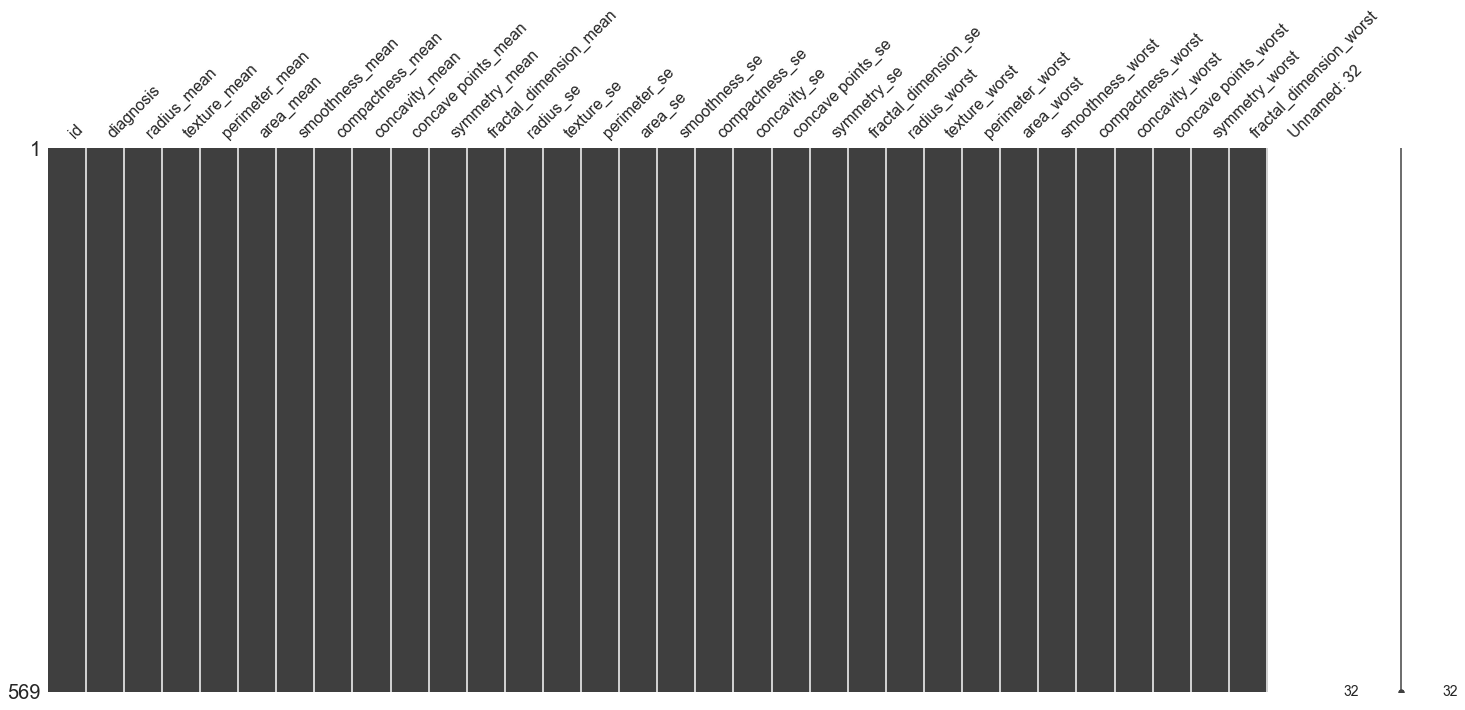

In [57]:
# Null 값 확인 

msno.matrix(df);

In [58]:
# 불필요 변수 드롭

df = df.drop(["id", "Unnamed: 32"], axis=1)

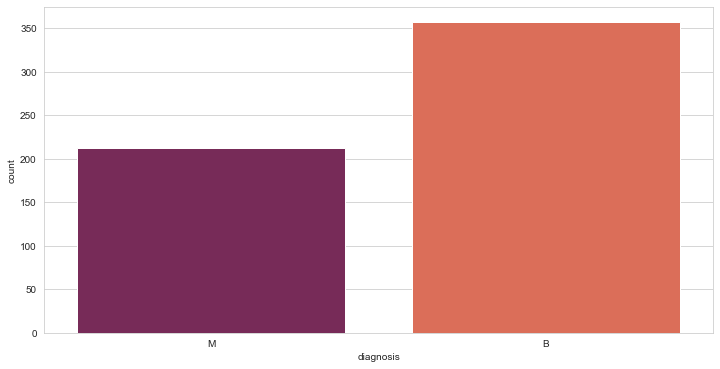

In [59]:
#데이터의 불균형, 이후 SMOTE 적용으로 해소

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="diagnosis", data=df, palette='rocket');

In [60]:
fields = ["mean", "se", "worst"]
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

## Data distribution

https://newly0513.tistory.com/141

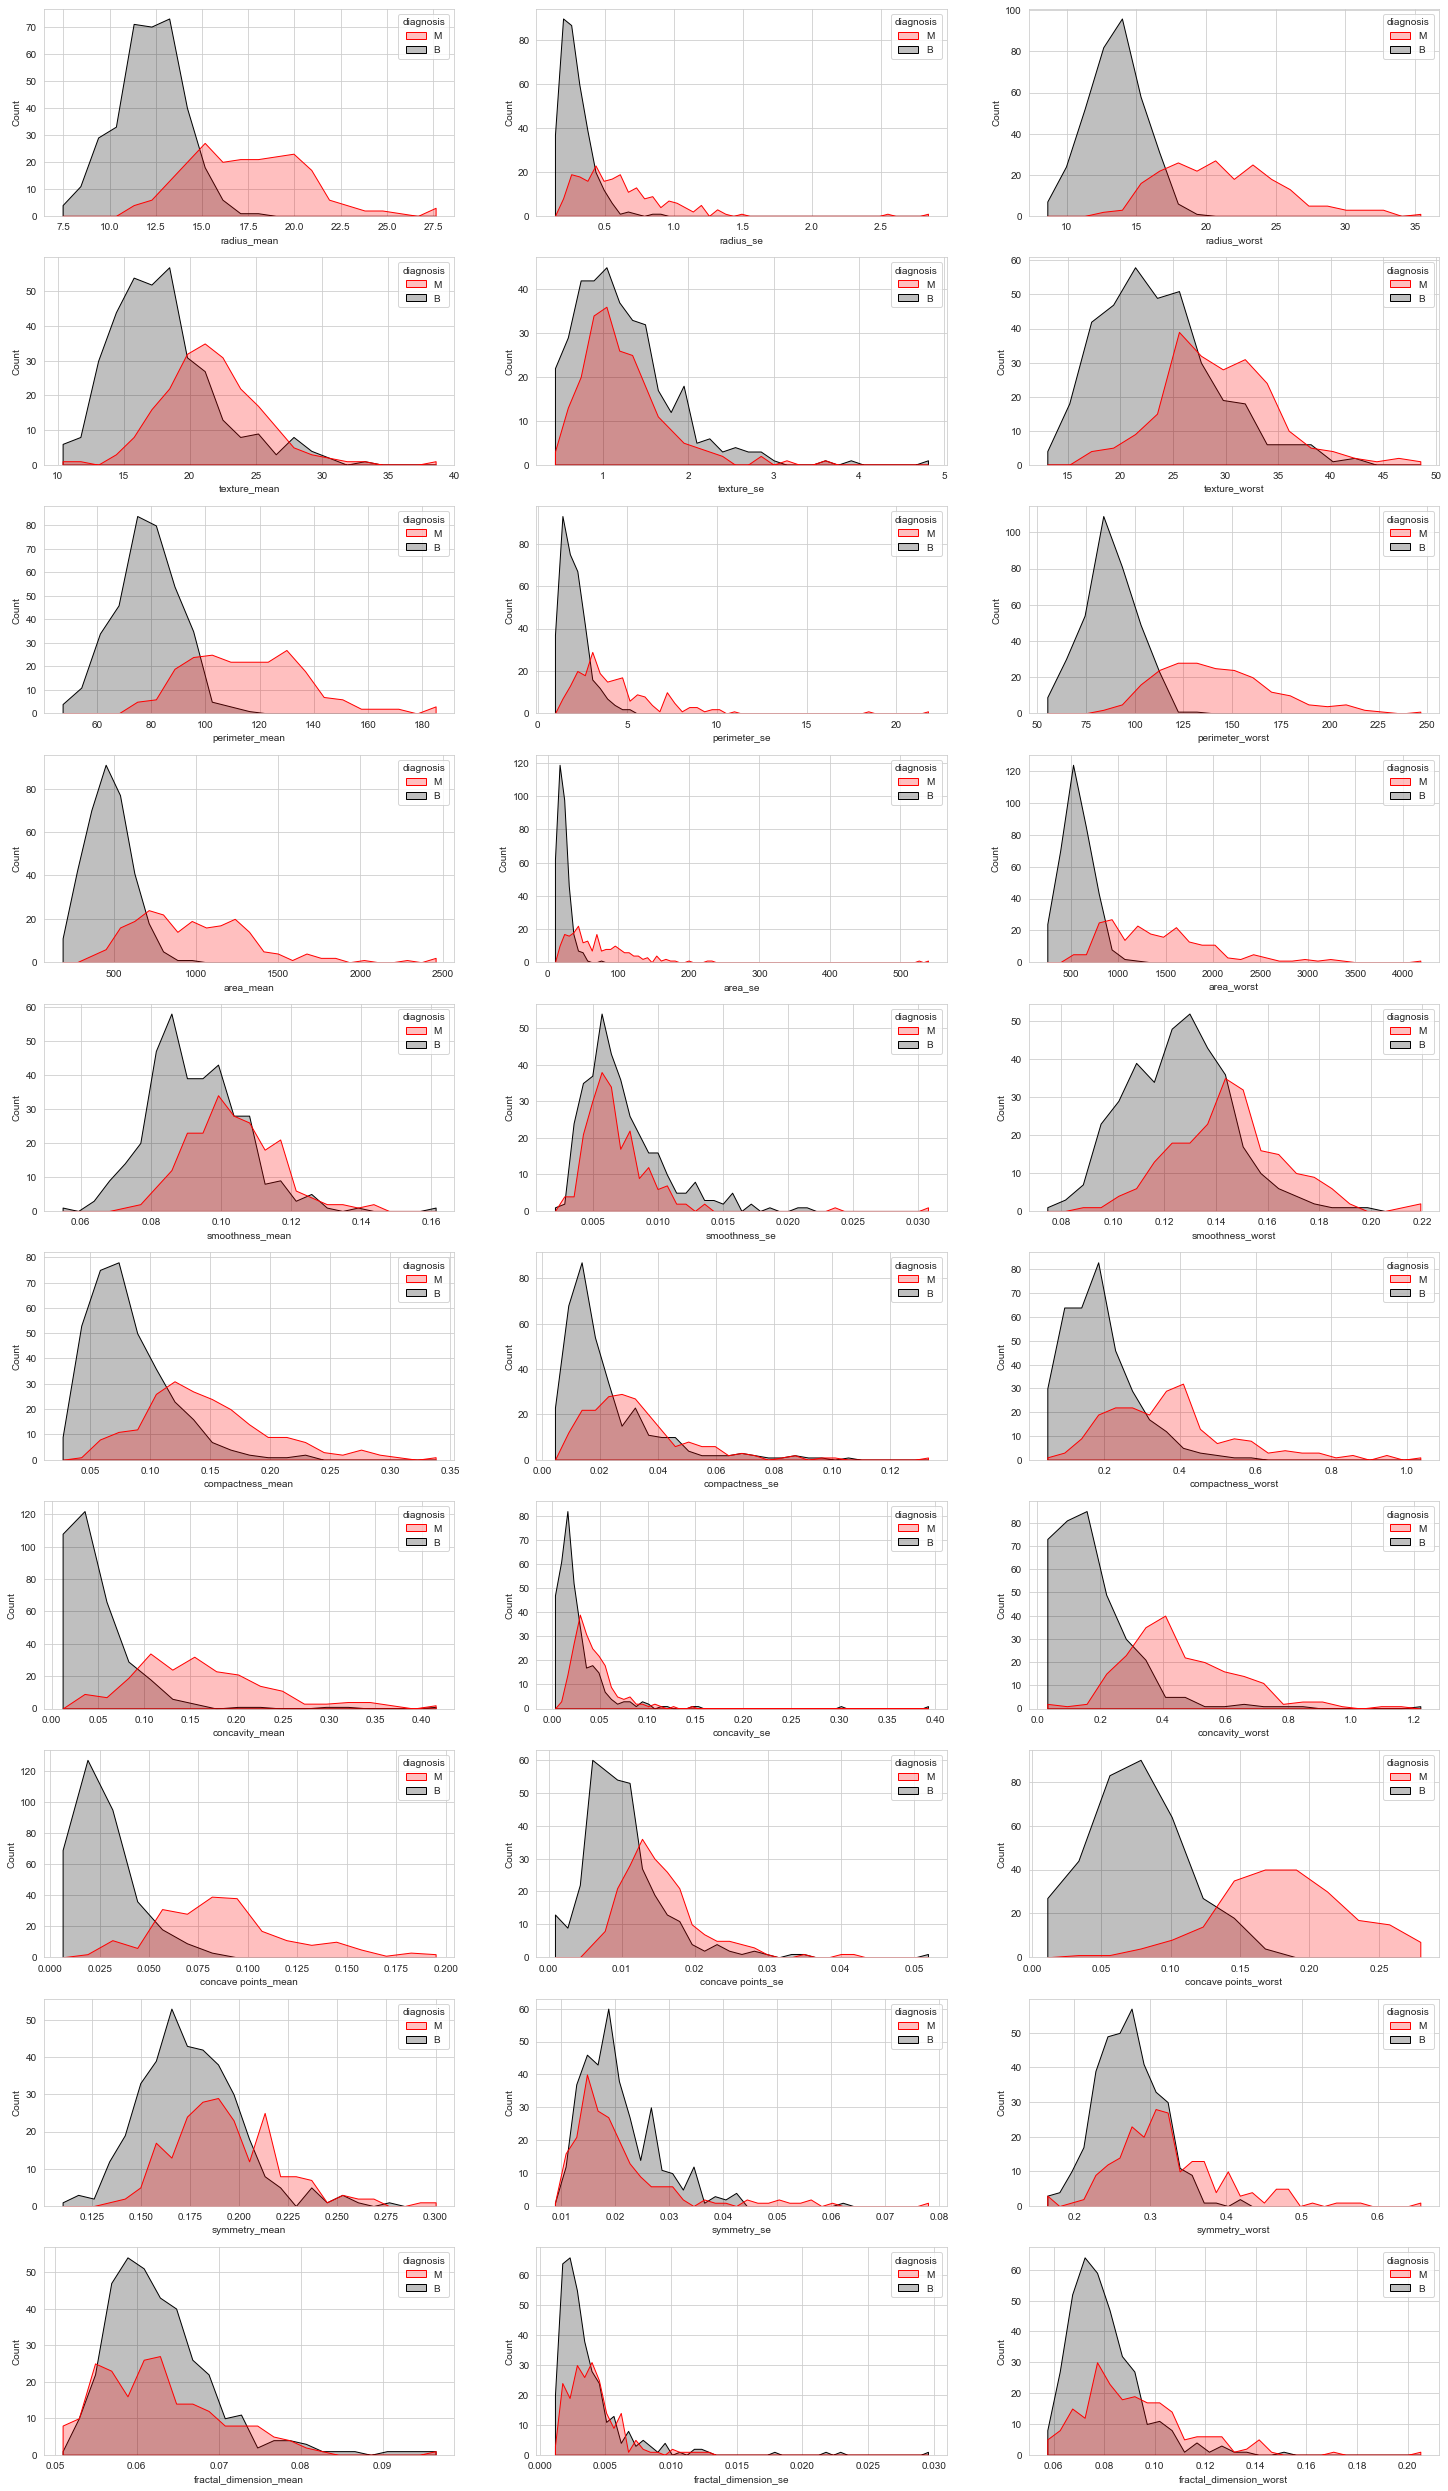

In [61]:
fig, axs = plt.subplots(10,3, figsize=(25,45))

for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        sns.histplot(df, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["red", "black"],
                     ax=axs[col][f])


# Relationship Between Features & Features

---

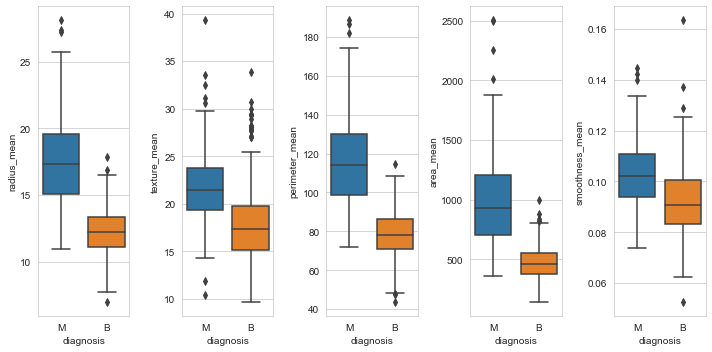

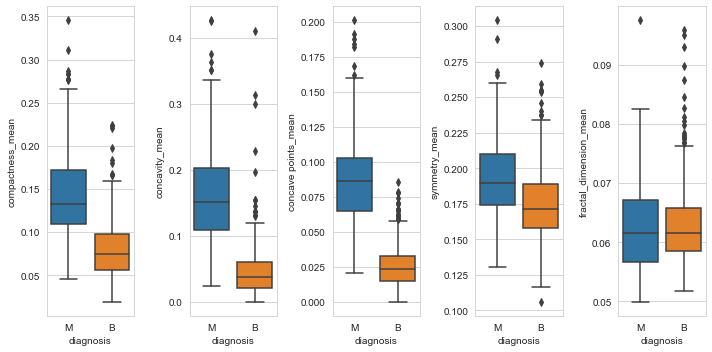

In [62]:
plt.rcParams['figure.figsize']=(10,5)
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concavity_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concave points_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=df,ax=ax5)
f.tight_layout()


# Preprocessing

---

In [63]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### IQR

https://hong-yp-ml-records.tistory.com/15
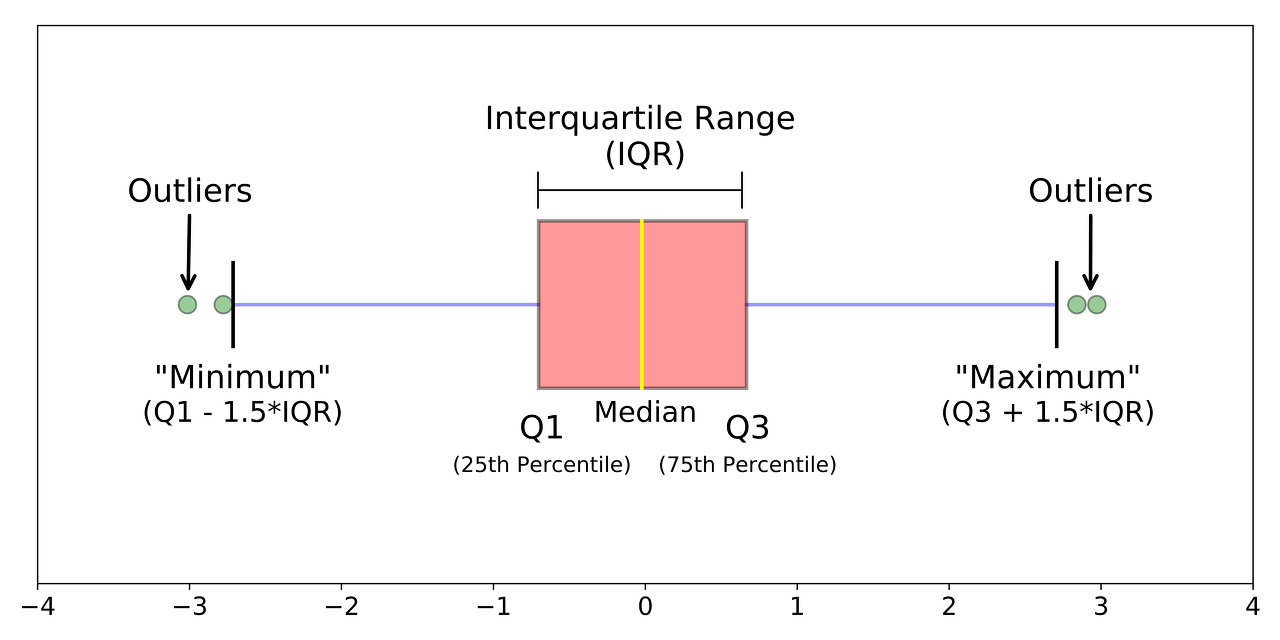



In [64]:
for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        Q1 = df[columns[col]+"_"+fields[f]].quantile(0.25)
        Q3 = df[columns[col]+"_"+fields[f]].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = (df[columns[col]+"_"+fields[f]] < lower_bound) | (df[columns[col]+"_"+fields[f]] > upper_bound)
        df[columns[col]+"_"+fields[f]][outliers] = df[columns[col]+"_"+fields[f]].mean()

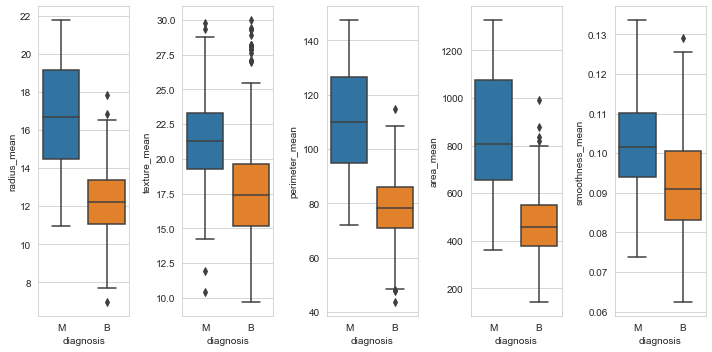

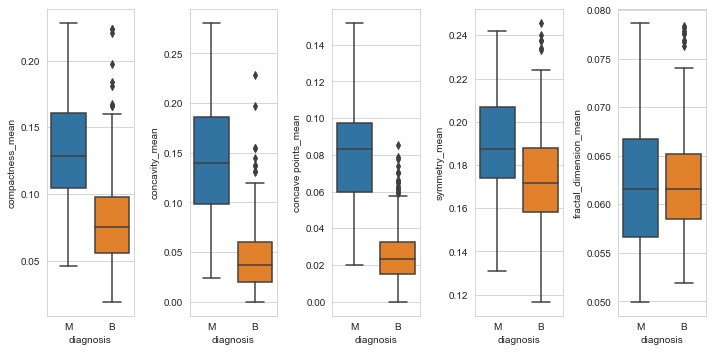

In [65]:
plt.rcParams['figure.figsize']=(10,5)
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concavity_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concave points_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=df,ax=ax5)
f.tight_layout()

### Multicollinearity removal


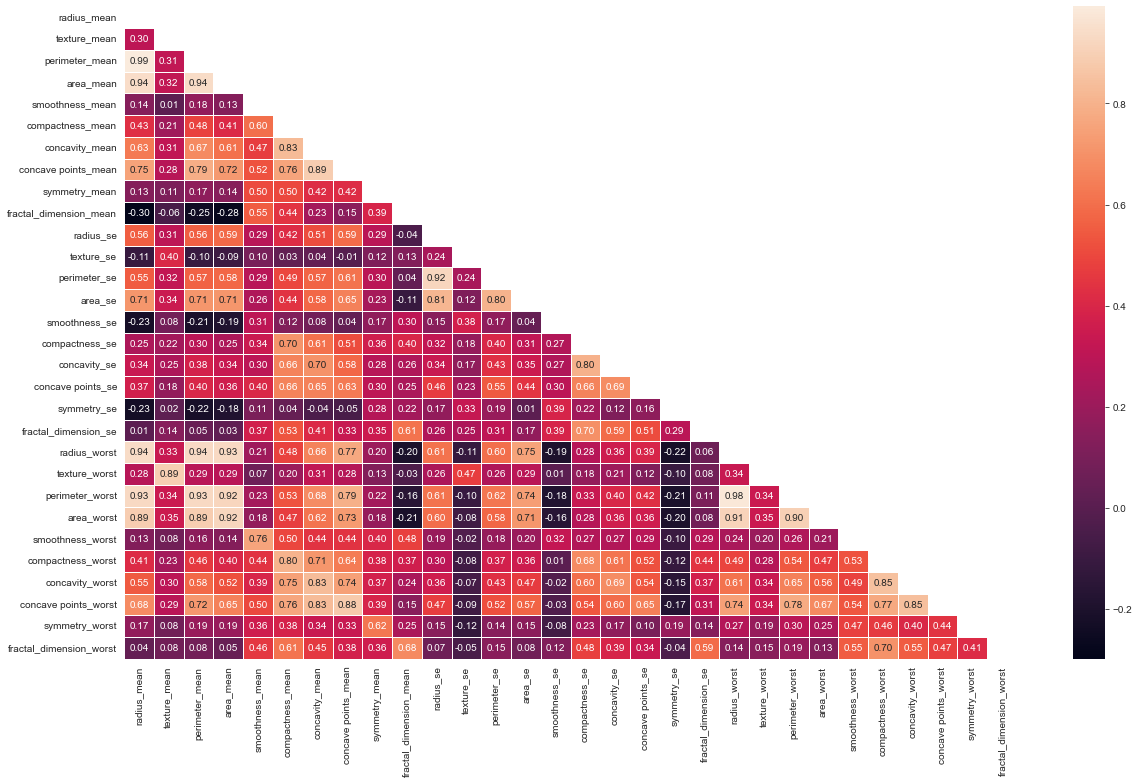

In [66]:

# heatmap 

plt.figure(figsize = (20, 12))

#상삼각행렬만 출력 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) 


sns.heatmap(corr,  mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [67]:
# 너무 높은 상관관계 제거..! 

corr_matrix = df.corr().abs() 


#상삼각행렬만 출력. 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

print(to_drop)

df = df.drop(to_drop, axis = 1)

print(f"제거되고 난 칼럼의 개수 : {df.shape[1]}")

['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst']
제거되고 난 칼럼의 개수 : 27


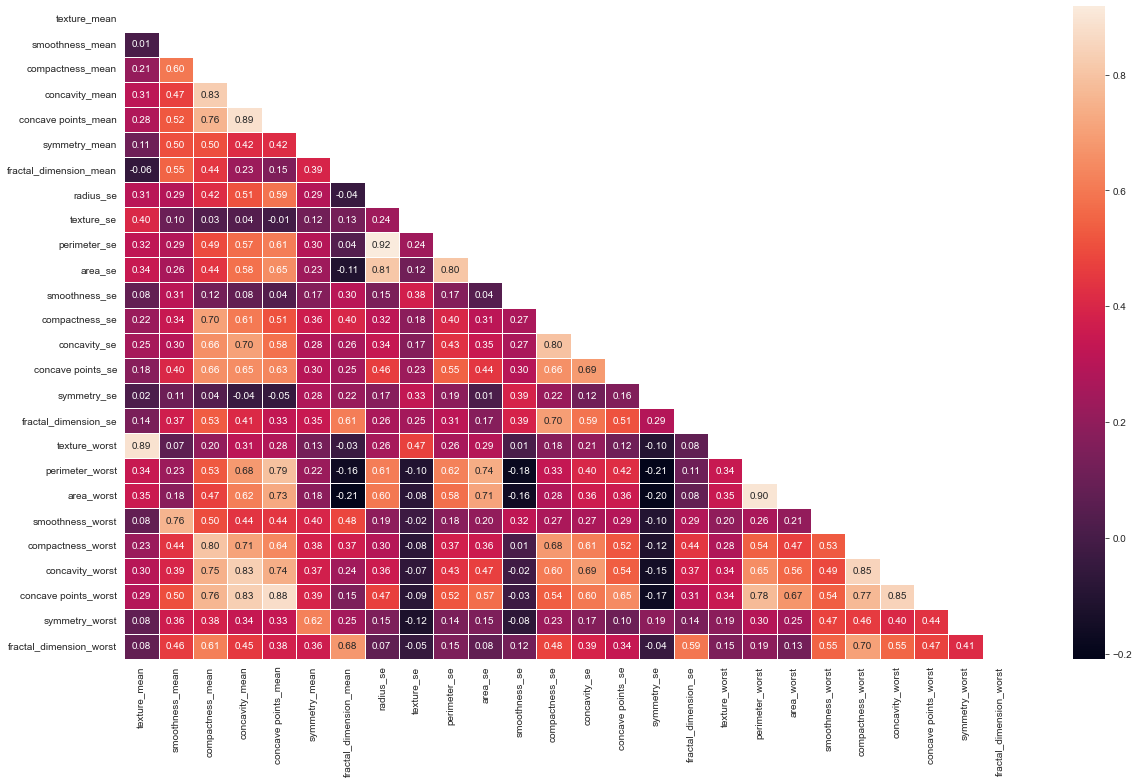

In [68]:
# heatmap 

plt.figure(figsize = (20, 12))

#상삼각행렬만 출력 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) 


sns.heatmap(corr,  mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [69]:
print(df.columns)

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Split The Data

---

In [70]:
x = df.drop("diagnosis", axis=1)  
y = df.diagnosis  #타겟

In [ ]:

y = pd.get_dummies(y)
y = y.drop("B", axis=1) 


In [72]:
x.head()

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.104341,0.088799,0.14710,0.241900,0.078710,0.405172,0.9053,2.866059,...,0.006193,17.33,184.60,880.583128,0.162200,0.254265,0.7119,0.2654,0.290076,0.118900
1,17.77,0.08474,0.078640,0.086900,0.07017,0.181200,0.056670,0.543500,0.7339,3.398000,...,0.003532,23.41,158.80,880.583128,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,21.25,0.10960,0.159900,0.197400,0.12790,0.206900,0.059990,0.745600,0.7869,4.585000,...,0.004571,25.53,152.50,1709.000000,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,20.38,0.09636,0.104341,0.241400,0.10520,0.181162,0.062798,0.495600,1.1560,3.445000,...,0.003795,26.50,98.87,567.700000,0.132369,0.254265,0.6869,0.2575,0.290076,0.083946
4,14.34,0.10030,0.132800,0.198000,0.10430,0.180900,0.058830,0.757200,0.7813,5.438000,...,0.005115,16.67,152.20,1575.000000,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


In [73]:
y.head()

,M
0,1
1,1
2,1
3,1
4,1


### Standard Scaler

---

> Standardize features by removing the mean and scaling to unit variance

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

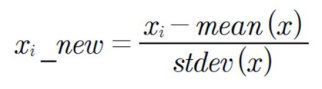

### Train-Test Split

---

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (455, 26) (455, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (572, 26) (572, 1)


In [ ]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (455, 26)
x_test: (114, 26)
y_train: (455, 1)
y_test: (114, 1)


In [ ]:
x_train

array([[-0.44748546,  0.80787106,  0.93421322, ...,  0.91959172,
         0.16478572,  2.62350642],
       [ 1.86249044,  1.37976541,  0.10368331, ...,  2.6752184 ,
         2.7346837 ,  0.16494441],
       [-1.31497641, -1.43319225, -0.2745366 , ..., -0.97048581,
         0.98313076,  0.23485872],
       ...,
       [-0.57498413, -2.41837559, -1.63991379, ..., -1.23756033,
        -0.78559427, -1.50167351],
       [ 0.12500856,  0.76211952,  0.30500714, ...,  1.03683652,
         0.76204013,  1.7442496 ],
       [ 0.35000622, -1.21053472, -1.33362526, ..., -0.61357437,
        -0.27901768, -0.94627628]])

# Modeling

---

In [ ]:
algorithms = [LogisticRegression, 
              LinearSVC, 
              RandomForestClassifier,
              KNeighborsClassifier,
              DecisionTreeClassifier,
              AdaBoostClassifier,
              GradientBoostingClassifier,
              LGBMClassifier,
              XGBClassifier,
             ]

             


In [ ]:
 df_algorithms = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy"])

In [ ]:
def autoML(algorithm): 

    model = algorithm().fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    model_name = algorithm.__name__
    
    y_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    return model_name, train_acc, test_acc

In [ ]:
for alg in algorithms:
    
    model_name, train_acc, test_acc = autoML(alg)
    
    df_algorithms = df_algorithms.append({"Model" : model_name,
                                          "Train Accuracy": train_acc,
                                          "Test Accuracy": test_acc}, ignore_index=True)

In [ ]:
df_algorithms.sort_values(by=["Test Accuracy", "Train Accuracy"], ascending = False)

,Model,Train Accuracy,Test Accuracy
1,LinearSVC,0.978022,0.982456
0,LogisticRegression,0.971429,0.982456
2,RandomForestClassifier,1.000000,0.964912
7,LGBMClassifier,1.000000,0.964912
8,XGBClassifier,1.000000,0.964912
5,AdaBoostClassifier,1.000000,0.956140
6,GradientBoostingClassifier,1.000000,0.956140
3,KNeighborsClassifier,0.980220,0.956140
4,DecisionTreeClassifier,1.000000,0.929825


# Tuning

---

In [ ]:
model = LinearSVC()
# model = LogisticRegression()

In [ ]:
parameters = {"penalty": ["l1","l2"],
              "loss": ["hinge", "squared_hinge"], 
              "C": [0.001, 0.01, 0.1, 1, 10],
              "multi_class": ["ovr", "crammer_singer"], 
              }

In [ ]:
cv_model = GridSearchCV(model, 
                        parameters, 
                        cv=5
                       ).fit(x_train, y_train)

In [ ]:
cv_model.best_params_

{'C': 0.01, 'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}

In [ ]:
tuned_model = LinearSVC(C = 0.01, 
                        loss = "hinge",
                        multi_class = "crammer_singer", 
                        penalty = "l1"

                        ).fit(x_train, y_train)

In [ ]:
y_pred = tuned_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9912280701754386

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



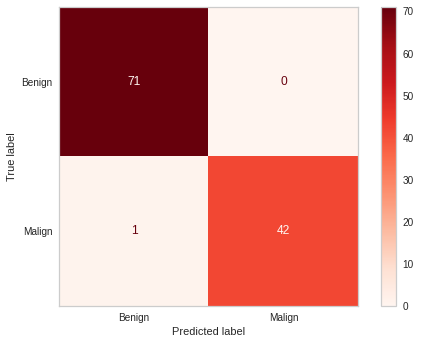

In [ ]:
plot_confusion_matrix(tuned_model,
                      x_test,
                      y_test,
                      display_labels=["Benign", "Malign"],
                      cmap=plt.cm.Reds)
plt.grid(False)

# Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


In [ ]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (455, 26)
x_test: (114, 26)
y_train: (455, 1)
y_test: (114, 1)


In [ ]:
print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 26)
Size of the training set: 455
Shape of the testing set: (114, 26)
Size of the testing set: 114


In [ ]:
model = Sequential([
    Dense(8 , input_dim =26,  activation='relu'),
    Dense(8 ,activation='relu'),
    Dense(1,activation='sigmoid') #이진분류, 시그모이드 사용 
])

#레이어를 선형으로 연결해서 구성하는 sequntial 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 216       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(optimizer='sgd',
             loss='binary_crossentropy',
              metrics=['accuracy'])


# #For a binary classification problem
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=30)
model.fit(x_train, y_train, epochs=50, batch_size=30)
model.save('model_breast_cancer.h5')

Epoch 1/50
16/16 [==============================] - 1s 14ms/step - loss: 0.8373 - accuracy: 0.3956 - val_loss: 0.7414 - val_accuracy: 0.4737
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7233 - accuracy: 0.5275 - val_loss: 0.6552 - val_accuracy: 0.6316
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.6835 - val_loss: 0.5880 - val_accuracy: 0.7632
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5815 - accuracy: 0.7648 - val_loss: 0.5270 - val_accuracy: 0.8158
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7934 - val_loss: 0.4780 - val_accuracy: 0.8509
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8286 - val_loss: 0.4360 - val_accuracy: 0.8772
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8505 - val_loss: 0.3999 - val_accuracy: 0.9035
Epoch 8/50
16/16 [=

In [ ]:
pretrained_model = keras.models.load_model('./model_breast_cancer.h5')
eval_score = pretrained_model.evaluate(x_test,y_test)
print('The loss of the evaluation :'+' '+str(eval_score[0]))
print('The accuracy of the evaluation :'+' '+str(eval_score[1]))

4/4 [==============================] - 0s 5ms/step - loss: 0.0636 - accuracy: 0.9912
The loss of the evaluation : 0.06356540322303772
The accuracy of the evaluation : 0.9912280440330505


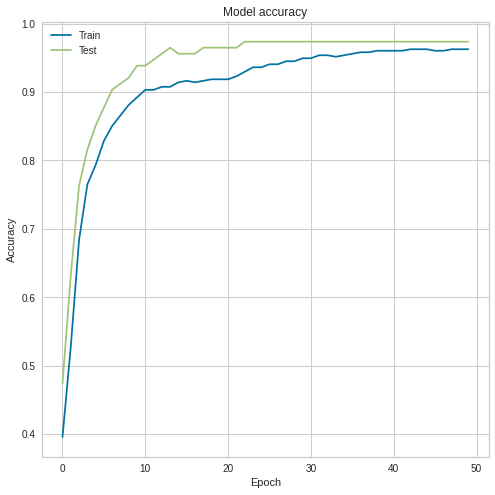

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.rcParams['lines.linewidth'] = 2
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


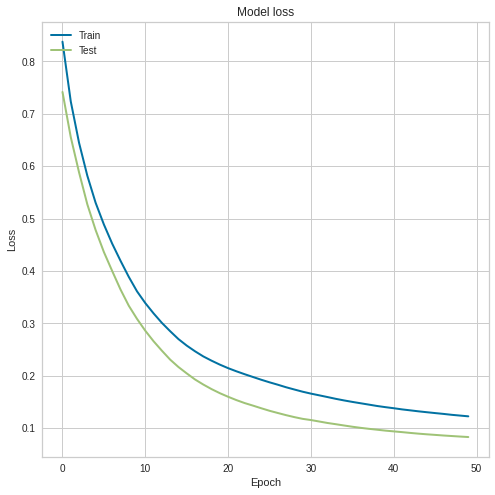

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.rcParams['lines.linewidth'] = 2
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()